In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from string import punctuation

In [2]:
data = pd.read_csv('data_minus_images/train.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

In [9]:
data.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


In [10]:
data.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed'],
      dtype='object')

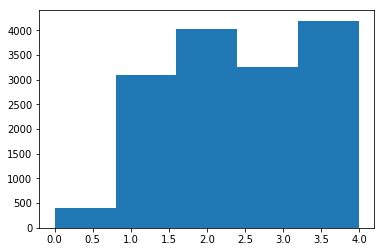

In [17]:
plt.hist(data.AdoptionSpeed, bins=5)
plt.show()

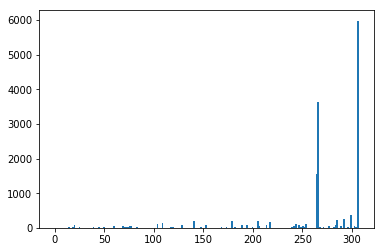

In [52]:
plt.hist(data.Breed1, bins=176)
plt.show()

In [57]:
data.groupby('Breed1').agg('count')['Name'].sort_values()

Breed1
286       0
7         0
197       0
257       0
290       0
56        1
61        1
64        1
269       1
81        1
85        1
93        1
228       1
165       1
248       1
154       1
123       1
125       1
130       1
139       1
143       1
176       1
99        1
146       1
298       1
217       1
192       1
3         1
21        1
23        1
       ... 
60       35
119      37
76       39
303      39
69       40
306      50
78       58
128      59
152      62
283      64
247      65
195      65
20       81
189      83
243      84
213      87
103      94
254      95
109     136
218     156
179     159
205     174
141     196
285     205
292     247
264     286
299     302
265    1148
266    3313
307    5406
Name: Name, Length: 176, dtype: int64

3 most common breeds make up 65% of the animals (mixed breed, domestic medium hair, domestice short hair)

In [58]:
(1148+3313+5406)/len(data)

0.6581071166544388

In [12]:
cat_features = ['Type', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'State', 
       'VideoAmt', 'PhotoAmt']

In [13]:
cont_features = ['Age', 'Quantity', 'Fee']

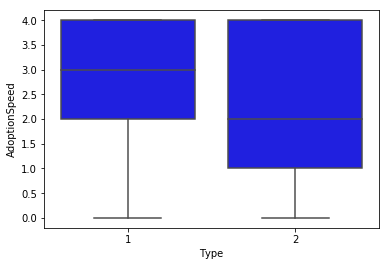

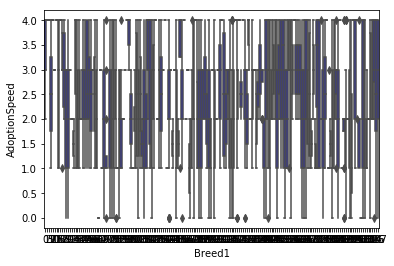

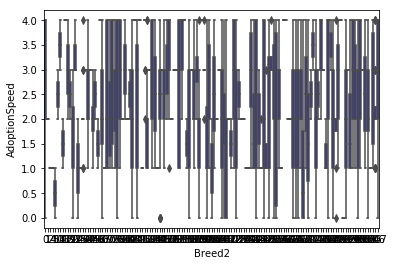

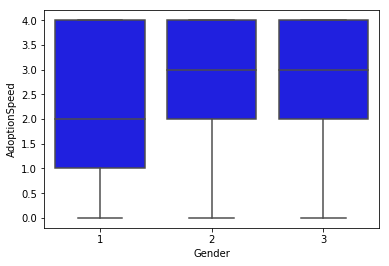

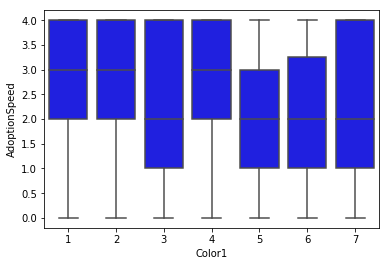

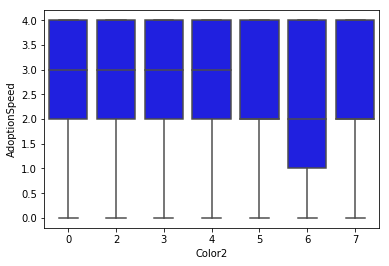

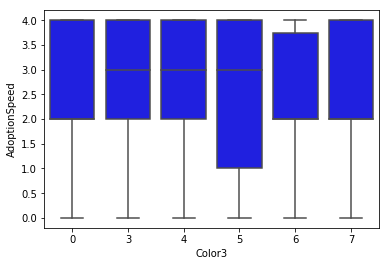

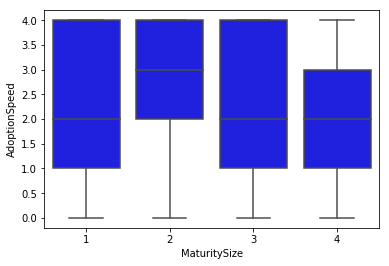

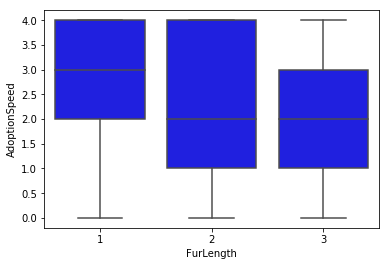

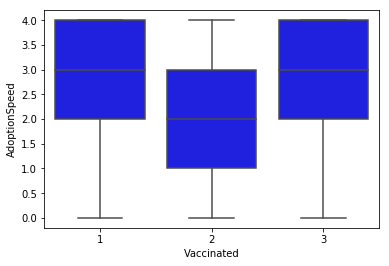

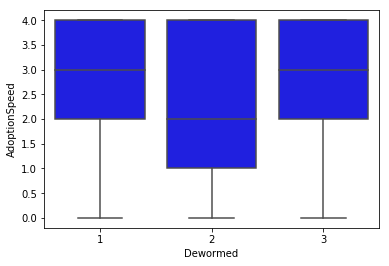

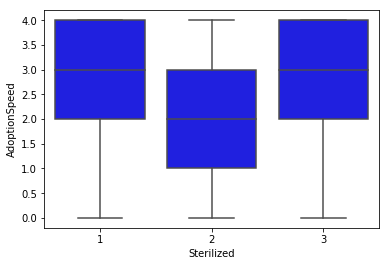

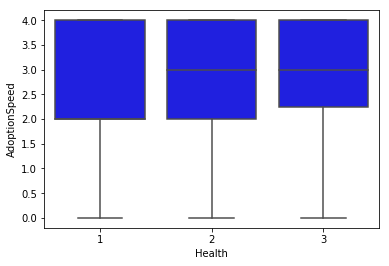

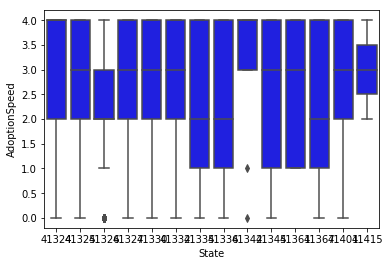

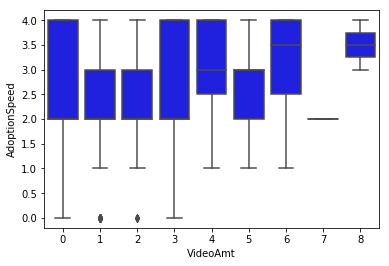

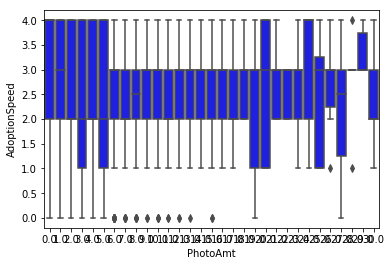

In [15]:
for feature in cat_features:
    sns.boxplot(feature, 'AdoptionSpeed', data=data, color='blue')
    plt.show()

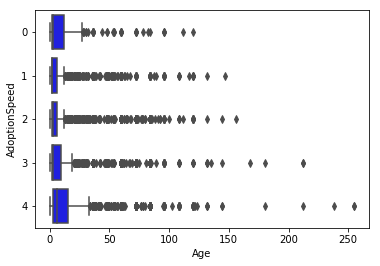

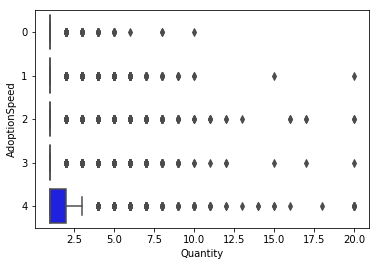

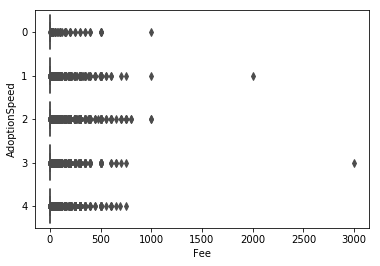

In [48]:
for feature in cont_features:
    sns.boxplot(feature, 'AdoptionSpeed', data=data, orient = 'h', color='blue')
    plt.show()

In [50]:
data.Description[25]

'Garfield is a very large cat. Needs daily grooming. He has been groomed short and deflea. Very good wt other cats. Calm cat. He is neutered, vaccinated and dewormed. Must be kept indoors. Needs grooming and brushing as his fur is very soft and thick. If you are interested to adopt Garfield, please give me a call or sent me an email. thank you.'

In [23]:
data.Description = data.Description.fillna("None")

In [24]:
bow = CountVectorizer(stop_words=stops)
bag = bow.fit_transform(data.Description)

In [42]:
stops = set(nltk.corpus.stopwords.words('english'))
stops = stops.union(set(["'s", "...", "-", "n't"]))

In [43]:
data['text'] = data['Description'].str.lower()
data['text'] = data['text'].apply(nltk.tokenize.word_tokenize)
data['text'] = data['text'].apply(lambda x: [w for w in x if not w in stops and not w in punctuation])

In [44]:
words_by_adopt_speed = data.groupby('AdoptionSpeed').agg({'AdoptionSpeed': 'mean', 'text': 'sum'})

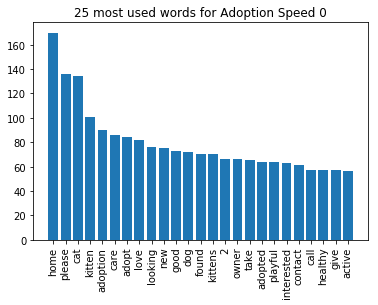

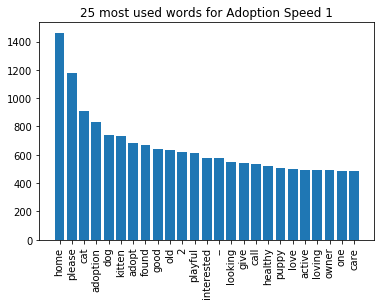

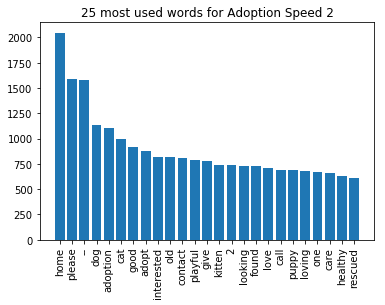

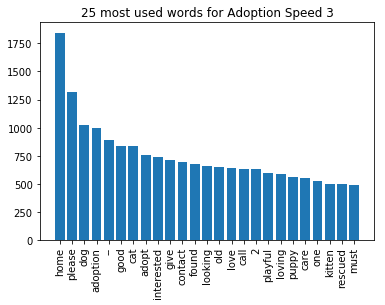

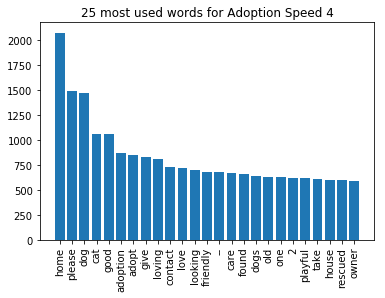

In [45]:
for i, row in words_by_adopt_speed.iterrows():
    desc = dict(nltk.FreqDist(row['text']))
    sort_desc = sorted(desc.items(), key=lambda x: x[1], reverse=True)[0:25]
    plt.bar(range(len(sort_desc)), [val[1] for val in sort_desc], align='center')
    plt.xticks(range(len(sort_desc)), [val[0] for val in sort_desc])
    plt.xticks(rotation=90)
    plt.title("25 most used words for Adoption Speed {}".format(row['AdoptionSpeed']))
    plt.show()